In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

df = pd.read_csv('E0.csv')

# Select relevant columns
df = df[['HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR']]  # Full-time goals and result
df.head()

In [29]:
#Drop the missing values
df.dropna(inplace=True)

In [30]:
#Encode target: FTR (H = 0, D = 1, A = 2)
label_map = {'H':0, 'D':1, 'A': 2}
df['FTR_encoded'] = df['FTR'].map(label_map)

In [57]:
#Basic features
df['goal_diff'] = df['FTHG'] - df['FTAG'] # Home advantage
df['total_goals'] = df['FTHG'] + df['FTAG']

#Label encode team names
le = LabelEncoder()
df['HomeTeam_encoded'] = le.fit_transform(df['HomeTeam'])
df['AwayTeam_encoded'] = le.fit_transform(df['AwayTeam'])

#Features and target
x = df[['HomeTeam_encoded', 'AwayTeam_encoded', 'goal_diff', 'total_goals']]
y = df['FTR_encoded']

#Train-test split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [32]:
#Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

#Predictions and accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy:.2f}')

Model Accuracy: 1.00


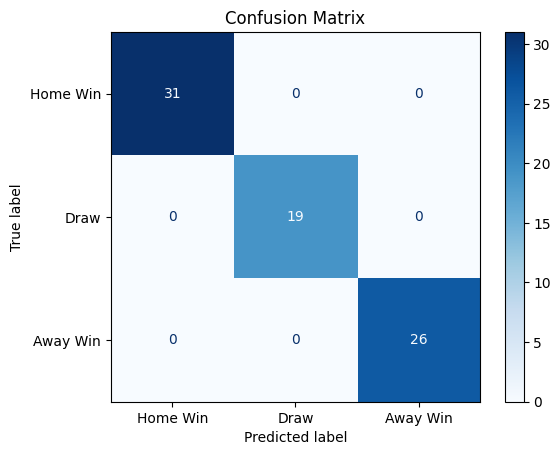

In [49]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=[0, 1, 2])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Home Win', 'Draw', 'Away Win'])

# Plot
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()


In [59]:
#Class metrics
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=['Home Win', 'Draw', 'Away Win']))


              precision    recall  f1-score   support

    Home Win       1.00      1.00      1.00        31
        Draw       1.00      1.00      1.00        19
    Away Win       1.00      1.00      1.00        26

    accuracy                           1.00        76
   macro avg       1.00      1.00      1.00        76
weighted avg       1.00      1.00      1.00        76



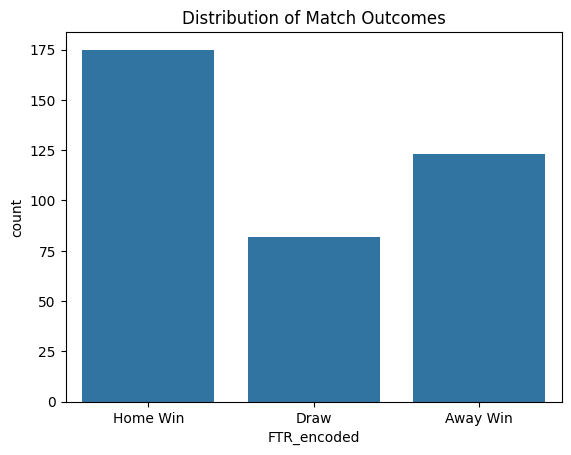

In [60]:
#Class distribution
import seaborn as sns

sns.countplot(x=y)
plt.title("Distribution of Match Outcomes")
plt.xticks(ticks=[0, 1, 2], labels=['Home Win', 'Draw', 'Away Win'])
plt.show()


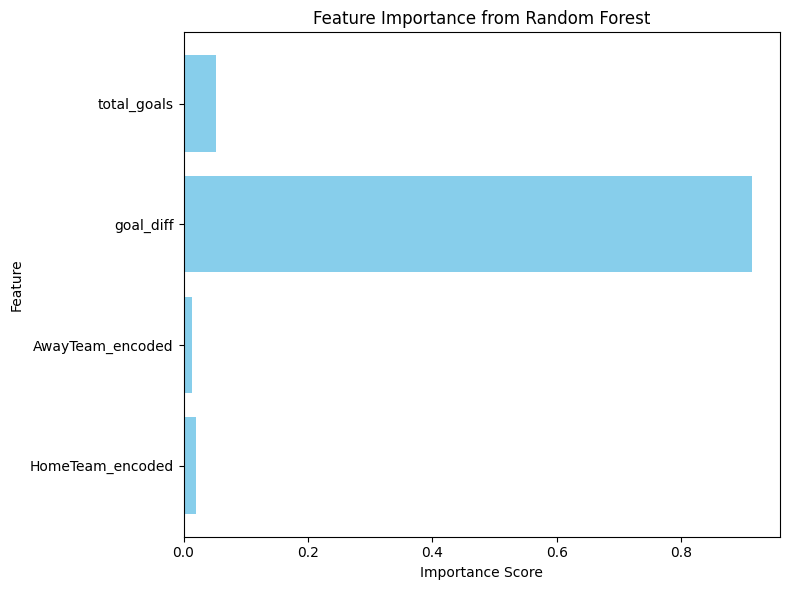

In [58]:
#Feature Importance
importances = model.feature_importances_
feature_names = X.columns  # Or whatever your feature names are
feat_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_df.sort_values('Importance', ascending=False)

plt.figure(figsize=(8, 6))
plt.barh(feat_df['Feature'], feat_df['Importance'], color='skyblue')
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()